In [12]:
import numpy as np
import os
from sklearn.utils.extmath import randomized_svd
from model import SimpleCBow, CBow
from utils.preprocess import Preprocess
from utils.optimizer import Adam
from utils.Train import Trainer
from utils.useful_func import remove_duplicate

In [6]:
with open("ptb.train.txt") as fp:
    string = fp.read()
preprocessed = Preprocess(string, ',', '.', '\n')
word_id, id_word, corpus = preprocessed.get_word_id()
data, label = preprocessed.create_context_target(corpus)

In [7]:
negative_sample=np.load('negative_sample2.npy')

| epoch 1     |  iter 9881  / 9883  | time        138[s] | loss 90.978

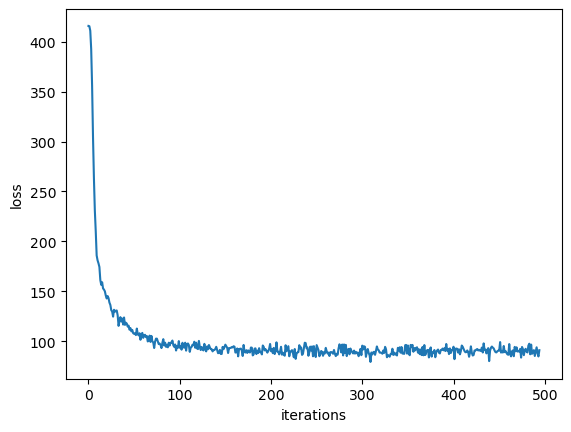

In [8]:
model = CBow(len(word_id), 100, 5, negative_sample)
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(data, label, max_epoch=1, batch_size=100)
trainer.plot()

In [17]:
word_vec = remove_duplicate(model.weights, model.grads)[0][0]
preprocessed.most_similar(word_vec, 'year', word_id, id_word, 10)

[('month', array(0.82449317, dtype=float32)),
 ('week', array(0.7731721, dtype=float32)),
 ('decade', array(0.5339359, dtype=float32)),
 ('digital', array(0.5189755, dtype=float32)),
 ('anticipating', array(0.51515263, dtype=float32)),
 ('quarter', array(0.5120728, dtype=float32)),
 ('plaintiff', array(0.49748397, dtype=float32)),
 ('summer', array(0.48860013, dtype=float32)),
 ('candidate', array(0.4848213, dtype=float32)),
 ('great', array(0.47904328, dtype=float32))]